# Logistic regression

In what follows, we will train a logistic regression model using the same data as that used for the linear regression model. To do so, we have replaced the last column of our Advertising dataset with a new one that contains a discrete value stating the success or failure of a marketing campaign:

-  1 if the campaign has been a success 
-  0 otherwise

In this case, our task will be to predict if a marketing campaign will succeed or not ($y$) depending on its advertising budget ($X$).

### Loading the data

We begin by loading the new dataset and selecting the dependent ($y$) and the independent ($X$) variables. Run the cell below to read the data and store it into a Pandas DataFrame called ```data```.

<div class="alert alert-block alert-warning">
You can see the difference between this dataset and the one used in the simple linear regression model by looking at the last column.
</div>

In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/jnin/information-systems/main/data/AdvertisingLog.csv')
data

,TV,radio,newspaper,success
0,230.1,37.8,69.2,1
1,44.5,39.3,45.1,0
2,17.2,45.9,69.3,0
3,151.5,41.3,58.5,1
4,180.8,10.8,58.4,1
...,...,...,...,...
195,38.2,3.7,13.8,0
196,94.2,4.9,8.1,0
197,177.0,9.3,6.4,1
198,283.6,42.0,66.2,0


<div class="alert alert-info"><b>Exercise 1 -- Define X and y </b>

Now write the code define the dependent and independent variables ```X``` and ```y```. Remember that the $y$ corresponds to the last column of your dataset. You can choose $X$ to be equal to any of the other columns.

</div>

<div class="alert alert-warning">

We use capital `X` instead of regular `x` for the variable name because usually you have more than one explanatory variable. Therefore, you have a matrix of explanatory variables, not a vector.

The results presented in this notebook are for the explanatory variable **TV**. 

</div>

In [9]:
X = data['TV']
y = data['success']

### Defining the model

Remember that a logistic regression model is defined as follows

$$ \hat{p} = P(\hat{Y} = 1) = \frac{1}{1+ e^{-(\hat{\beta_0} + \hat{\beta_1} X_1)}} $$

To avoid to repeat the previous task of finding the optimal betas. $\beta_0$ and $\beta_1$ have been already calculated. Run the cell below to store their values.

In [8]:
b0 = -3.86734214
b1 = 0.02196707

### Odds Computation

Let's use this values to compute the log odds. Log odds have a linear relationship with the independent variable $X_1$ defined by the equation

$$
log\frac{\hat{p}}{1 - \hat{p}} = \hat\beta_0 + \hat\beta_1 X_1
$$

<div class="alert alert-info"><b>Exercise 2 -- log_odds definition </b>

Use the equation above to compute the log odds and save them to a new variable called ```log_odds```.

</div>

In [11]:
log_odds = b0 + b1*X
log_odds


0      1.187281
1     -2.889808
2     -3.489509
3     -0.539331
4      0.104304
         ...   
195   -3.028200
196   -1.798044
197    0.020829
198    2.362519
199    1.231215
Name: TV, Length: 200, dtype: float64

### Making predictions

We want to compute the probability of success for a marketing campaign depending on the each invested budget $X_{i1}$. First, we have to define a function to compute $\hat{p}$ given $X_1$, remember that
$$ \hat{p} = P(\hat{Y} = 1) = \frac{1}{1+ e^{-(\hat{\beta_0} + \hat{\beta_1} X)}} $$


<div class="alert alert-info"><b>Exercise 3 -- Define the regression model </b>

So now we can re-use the previous odds computation to define a function to find $\hat{p}$ given $X_1$. Remember, that the sign of the exponent for the negative probability $p$ changes.

</div>

<div class="alert alert-warning">

To enhance readability, we will encapsulate this operation in a function named ```regression_model```.

</div>

In [33]:
def regression_model(b0, b1, x):
    p = (1/(1+np.exp(-b0-b1*x)))
    return p

Use the function above to compute the predicted probabilities for all the samples in your dataset. Store the resulting values in a variable called ```prob_pred```.

In [38]:
prob_pred = regression_model(b0, b1, X)
prob_pred

0      0.766254
1      0.052660
2      0.029612
3      0.368343
4      0.526052
         ...   
195    0.046168
196    0.142089
197    0.505207
198    0.913924
199    0.774031
Name: TV, Length: 200, dtype: float64

Remember that in order to obtain predictions using your logistic model, you need to fix a threshold to go from probabilities to classes:

if $\hat p >$ threshold then Y = 1 (Prediction=Success) \
if $\hat p \leq$ threshold then Y = 0 (Prediction=Fail) 


<div class="alert alert-info"><b>Exercise 4 -- Prediction computation </b>

Do so by defining a function to convert probabilities to classes. Call this function ```probabilities_to_classes```. This function should take as input an array ```probs``` containign the probability values and an float ```prob_threshold``` with the considered threshold; and return an array with the classes corresponding to the given probability values.

</div>

In [41]:
def probabilities_to_predictions(probs, prob_threshold):
    result = []
    for ind in range(len(probs)):
        if probs[ind] > prob_threshold:
            result.append(1)
        else:
            result.append(0)
    return np.array(result)

Finally use this function to obtain label predictions for all the sample susing a threshold equal to 0.5. Store the resulting values in a variable called ```y_pred```.

In [42]:
threshold = 0.5
y_pred = probabilities_to_predictions(prob_pred,threshold)

print(prob_pred)
print(y_pred)

0      0.766254
1      0.052660
2      0.029612
3      0.368343
4      0.526052
         ...   
195    0.046168
196    0.142089
197    0.505207
198    0.913924
199    0.774031
Name: TV, Length: 200, dtype: float64
[1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1
 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1
 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1
 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1]


### Evaluating the model

Of course, if we change the threshold we will achieve different values for the accuracy metric. However, this is out of the scope of this session, so we will only compute the accuracy for threshold = 0.5

Remember that the accuracy metric is defined as 

$$ \text{accuracy} = \frac {\text{cp}}{\text{tp}} $$

where **cp** and **tp** stand for correct predictions and the total number of predictions respectively.

<div class="alert alert-info"><b>Exercise 5 -- Accuracy computation </b>

Write the code to compute the accuracy as above. Save the value to a new variable called ```accuracy```.

</div>

In [47]:
accuracy=sum(y==y_pred)/len(y_pred)
accuracy

0.845

### Plotting results
<div class="alert alert-block alert-warning">
Plotting in python is not part of this subject. The next cell is just for illustration purposes.
</div>

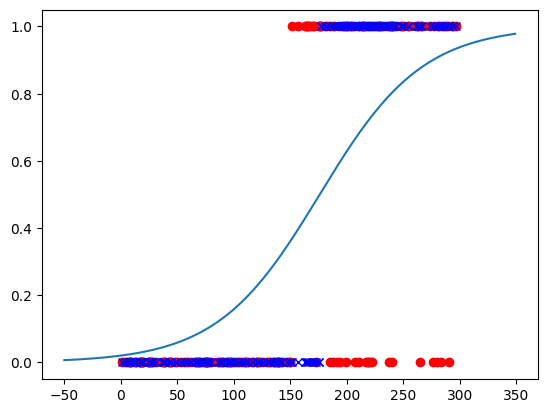

In [48]:
import matplotlib.pyplot as plt
X_plot = np.arange(-50, 350)
y_plot = regression_model(b0, b1, X_plot)
plt.plot(X_plot, y_plot)
plt.plot(X, y, "ro")
plt.plot(X, y_pred, "bx")